In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

START_YEAR = 1992
END_YEAR = 2020
HEM = 'sh'

PATH_SOURCE = "/home/jbassham/jack/data/sh"

In [2]:
# Extract variables

fnam = f"motion_ppv4_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v']
r = data['error'] # ice velocity uncertainty (for u and v)
lat = data['lat']
lon = data['lon']
time = data['time']

print('Velocity, Uncertainty Loaded')

fnam = f"con_nimbus7_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic'] # ice concentration

print('Concentration Loaded')

print('Variable Files Loaded')

# Mask ice concentration
ic_raw = np.round(ic * 250) # raw value ice concentration (NSIDC)

# NSIDC Masks 
# 251 pole hole
# 252 unused data
# 253 coastline
# 254 land
ic = np.where((ic_raw == 251) | (ic_raw == 252) | (ic_raw == 253) | (ic_raw == 254), np.nan, ic)

print('ic masked')

# Shift present day parameters forward one day, for one point Middle Weddell
uit = ui[1:,:,:]
vit = vi[1:,:,:]

ict = ic[1:,:,:]
tt = time[1:]
rt = r[1:,:,:]

# Remove last day from previous day parameters
icy = ic[:-1,:,:]
ty = time[:-1]

print('days shifted')

Velocity, Uncertainty Loaded
Concentration Loaded
Variable Files Loaded
ic masked
days shifted


In [3]:
cit = np.sqrt(uit ** 2 + vit ** 2)

cit_std = np.nanstd(cit)

print(f"Std Ice Speed: {cit_std:.3f} cm/s")

Std Ice Speed: 7.939 cm/s


In [4]:
# Create list of input variables
invars = [uit, vit, rt, icy]
nvars = len(invars)
var_names = ['uit', 'vit', 'rt', 'icy']

# Calcluate pre-mask means and stds
globMeans = [np.nanmean(var) for var in invars]
gridMeans = [np.nanmean(var, axis = 0) for var in invars]

globStds = [np.nanstd(var) for var in invars]
gridStds = [np.nanstd(var, axis = 0) for var in invars]

for globMean, var_name in zip(globMeans, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_2647063/2489473480.py:8: RuntimeWarning: Mean of empty slice
  gridMeans = [np.nanmean(var, axis = 0) for var in invars]
/home/jbassham/miniconda3/envs/seaice/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Mean uit: -0.004
Mean vit: 2.188
Mean rt: 62.667
Mean icy: 0.515

Std uit: 9.492
Std vit: 8.360
Std rt: 60.647
Std icy: 0.403


In [5]:
# Mask spatial indices with concentration less than .15, NaN concentration
# NOTE keeping flag values for ice velocity uncertainties
mask2 = (ict <= .15) | (np.isnan(ict))

# NaN out points meeting mask condition
invarsMask2 = [np.where(mask2, np.nan, var) for var in invars]

# Calcluate first-masked means and stds
globMeans2 = [np.nanmean(var) for var in invarsMask2]
gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]

globStds2 = [np.nanstd(var) for var in invarsMask2]
gridStds2 = [np.nanstd(var, axis = 0) for var in invarsMask2]

for globMean, var_name in zip(globMeans2, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds2, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_2647063/4038096303.py:10: RuntimeWarning: Mean of empty slice
  gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]


Mean uit: -0.005
Mean vit: 2.198
Mean rt: 62.547
Mean icy: 0.785

Std uit: 9.508
Std vit: 8.375
Std rt: 59.266
Std icy: 0.197


In [6]:
# Unpack masked variables
uit, vit, rt, icy = invarsMask2

In [7]:
print("Mean rt: {:.3f}".format(np.nanmean(rt)))
print("Std rt: {:.3f}".format(np.nanstd(rt)))
print('')
print("Min rt: {:.3f}".format(np.nanmin(rt)))
print("Max rt: {:.3f}".format(np.nanmax(rt)))

Mean rt: 62.547
Std rt: 59.266

Min rt: 4.000
Max rt: 1182.000


In [8]:
cit = np.sqrt(uit ** 2 + vit ** 2)

cit_std = np.nanstd(cit)

print(f"Std Ice Speed: {cit_std:.3f} cm/s")

# Normalize ice velocity uncertainty by std of ice speed
n_rt = rt / cit_std

Std Ice Speed: 7.937 cm/s


In [9]:
print("Mean n_rt: {:.3f}".format(np.nanmean(n_rt)))
print("Std n_rt: {:.3f}".format(np.nanstd(n_rt)))
print('')
print("Min n_rt: {:.3f}".format(np.nanmin(n_rt)))
print("Max n_rt: {:.3f}".format(np.nanmax(n_rt)))

Mean n_rt: 7.881
Std n_rt: 7.467

Min n_rt: 0.504
Max n_rt: 148.930


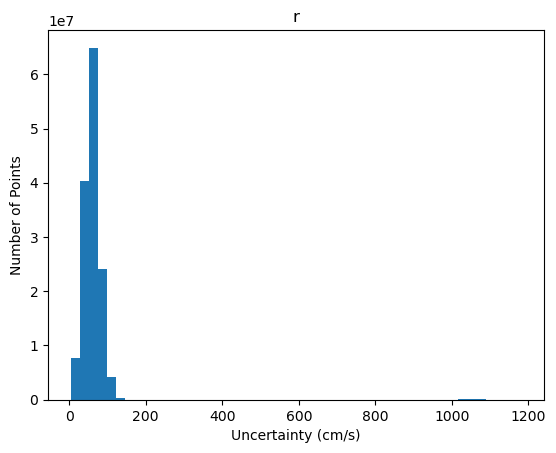

In [10]:
plt.hist(rt.flatten(), bins=50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title('r')
plt.show()

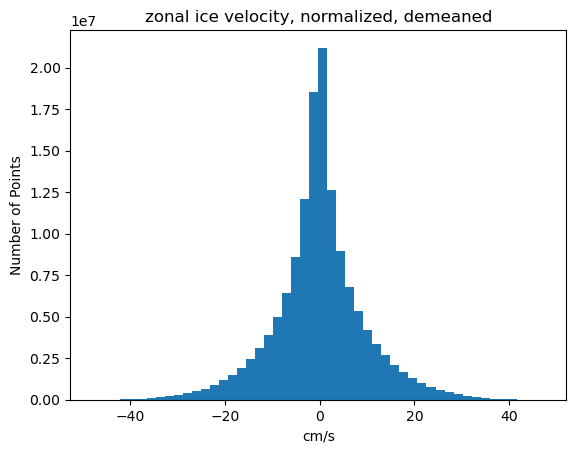

In [11]:
plt.hist(uit.flatten(), bins=50)
plt.xlabel('cm/s')
plt.ylabel('Number of Points')
plt.title('zonal ice velocity, normalized, demeaned')
plt.show()

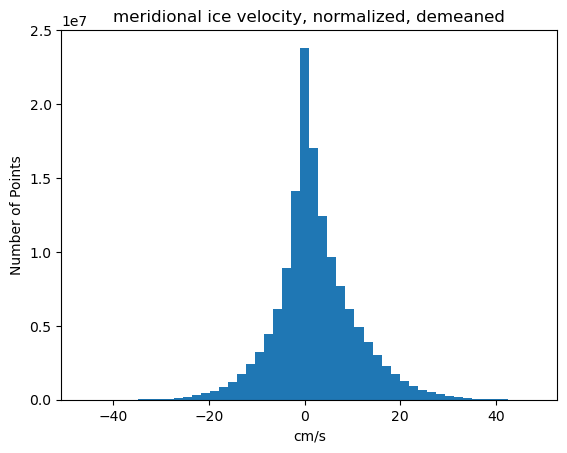

In [12]:
plt.hist(vit.flatten(), bins=50)
plt.xlabel('cm/s')
plt.ylabel('Number of Points')
plt.title('meridional ice velocity, normalized, demeaned')
plt.show()

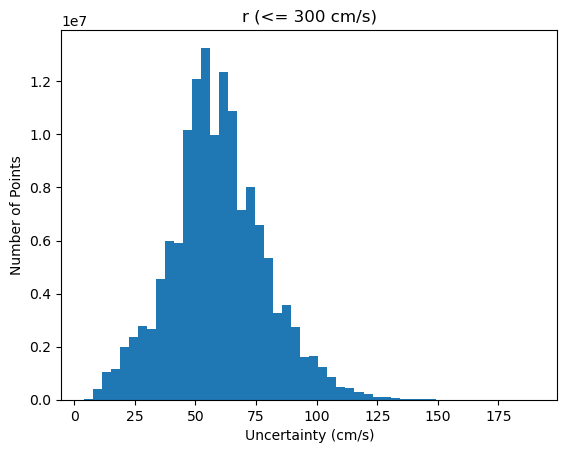

In [13]:
# Plot histogram values between 0 and 300
rt_masked = rt[(rt >= 0) & (rt <= 300)]

plt.hist(rt_masked.flatten(), bins=50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title('r (<= 300 cm/s)')
plt.show()

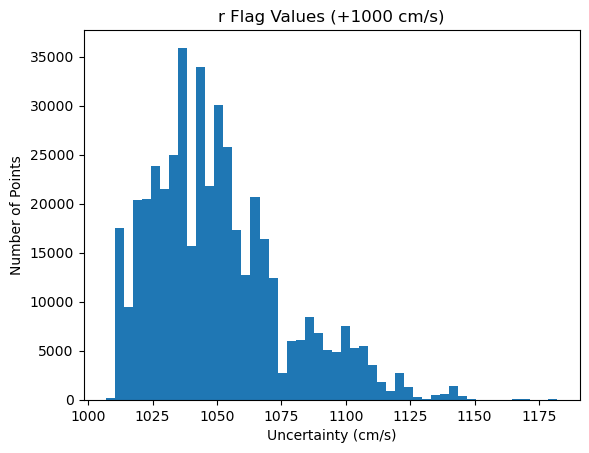

In [14]:
# Plot histogram values between 0 and 300
rt_masked = rt[(rt > 300) & (rt <= 1200)]

plt.hist(rt_masked.flatten(), bins=50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title('r Flag Values (+1000 cm/s)')
plt.show()

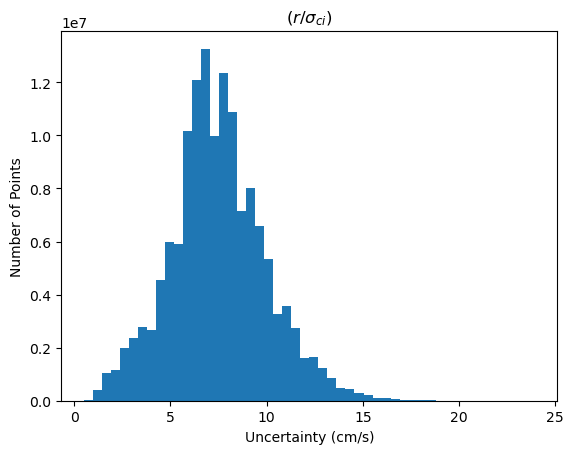

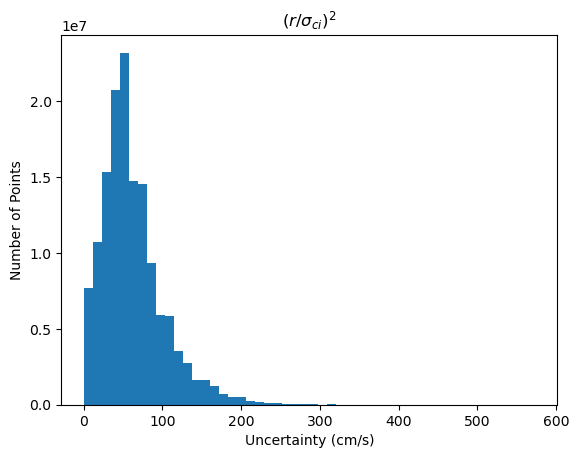

In [15]:
n_rt_filt = n_rt[n_rt < 100]

plt.hist((n_rt_filt).flatten(), bins = 50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title(r'$(r/ \sigma_{ci}) $')
plt.show()

plt.hist(((n_rt_filt) ** 2).flatten(), bins = 50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title(r'$(r/ \sigma_{ci})^2 $')
plt.show()

In [16]:
log_n_rt = np.log(n_rt)

print("Mean log(n_rt): {:.3f}".format(np.nanmean(log_n_rt)))
print("Std log(n_rt): {:.3f}".format(np.nanstd(log_n_rt)))
print('')
print("Min log(n_rt): {:.3f}".format(np.nanmin(log_n_rt)))
print("Max log(n_rt): {:.3f}".format(np.nanmax(log_n_rt)))

Mean log(n_rt): 1.958
Std log(n_rt): 0.416

Min log(n_rt): -0.685
Max log(n_rt): 5.003


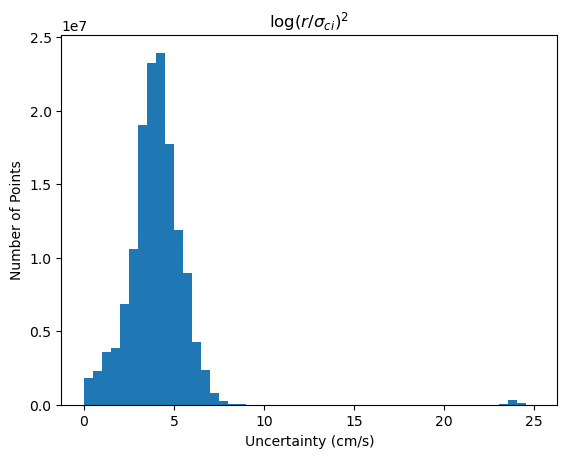

In [17]:
plt.hist(log_n_rt.flatten() ** 2, bins = 50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title(r'$ \log(r/ \sigma_{ci})^2 $')
plt.show()

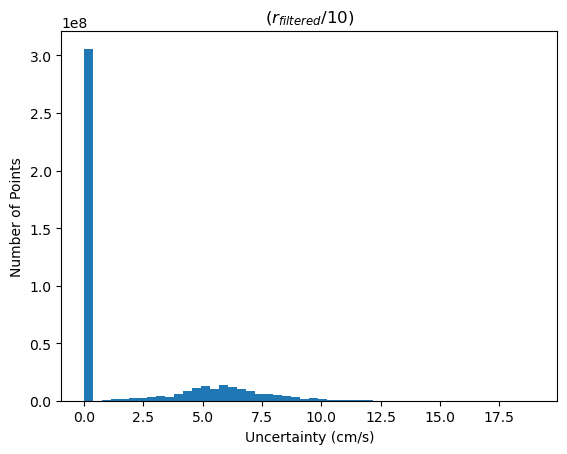

In [18]:
# Scaling used in previous WCNN

# Remove flag values (1000+) from uncertainty
rt_filt = np.where(rt > 1000, rt - 1000, rt)

n10rt = rt_filt / 10.0

# Convert nan values
n10rt_1 = np.nan_to_num(n10rt, 0.01)

plt.hist((n10rt_1).flatten(), bins = 50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title(r'$(r_{filtered} / 10) $')
plt.show()

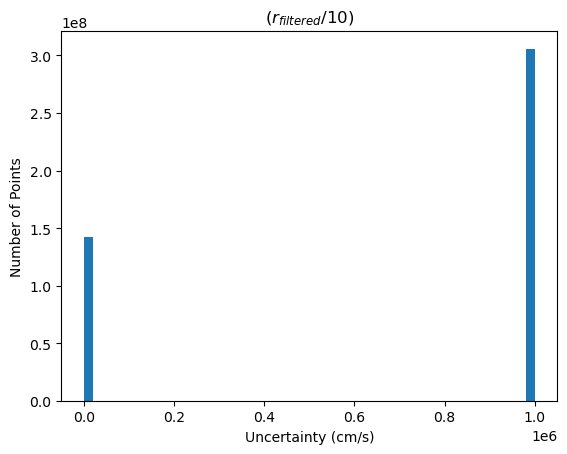

In [19]:
n10rt_2 = np.where(np.isnan(n10rt), 1e6, n10rt)

plt.hist((n10rt_2).flatten(), bins = 50)
plt.xlabel('Uncertainty (cm/s)')
plt.ylabel('Number of Points')
plt.title(r'$(r_{filtered} / 10) $')
plt.show()

mean(w) 0.062
std(w) 0.109
sum(w) 27842496.424


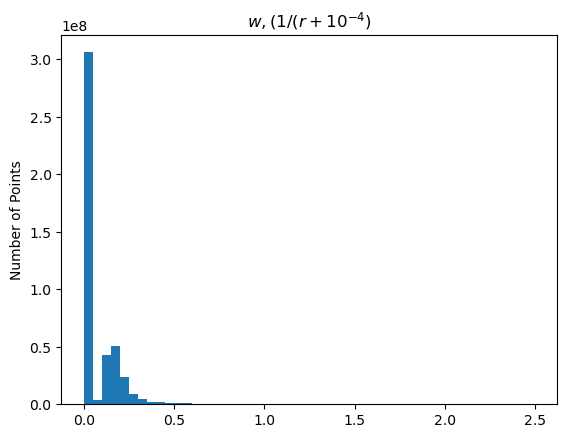

In [20]:
w = 1 / (n10rt_2 + 1e-4)

print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w) {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r + 10^{-4}) $')
plt.show()

mean(w) 1.000
std(w) 1.751
sum(w) 27842496.424


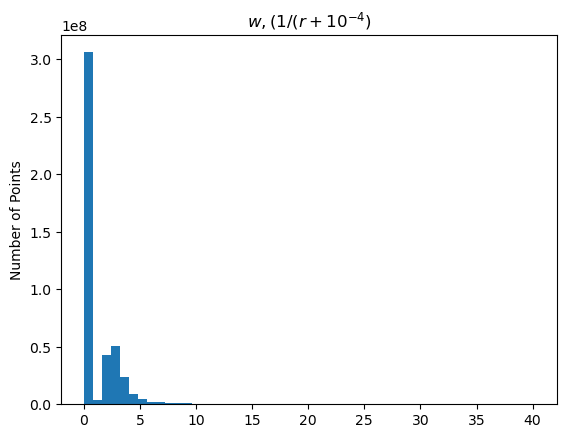

In [21]:
w_norm = w / np.nanmean(w)

print(f"mean(w) {np.nanmean(w_norm):.3f}")
print(f"std(w) {np.nanstd(w_norm):.3f}")
print(f"sum(w) {np.nansum(w):.3f}")

plt.hist((w_norm).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r + 10^{-4}) $')
plt.show()

mean(w) 0.049
std(w) 0.086
sum(w)  22004698.809


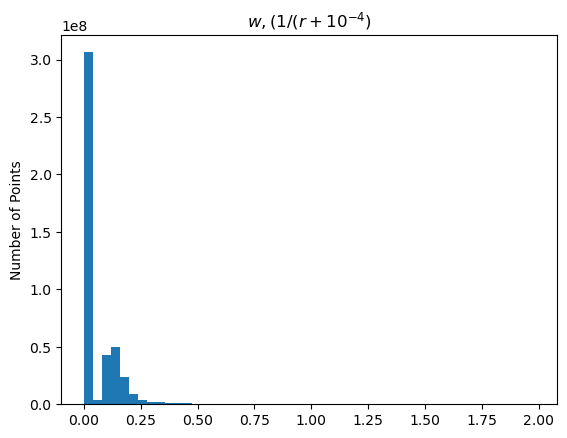

In [22]:
# Try normalizing weights by the speed std, no flag values removed

nrt_f = np.where(np.isnan(n_rt), 1e6, n_rt)

w = 1 / (nrt_f + 1e-4)
print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r + 10^{-4}) $')
plt.show()

mean(w) 1.000


std(w) 1.754
sum(w)  22004698.809


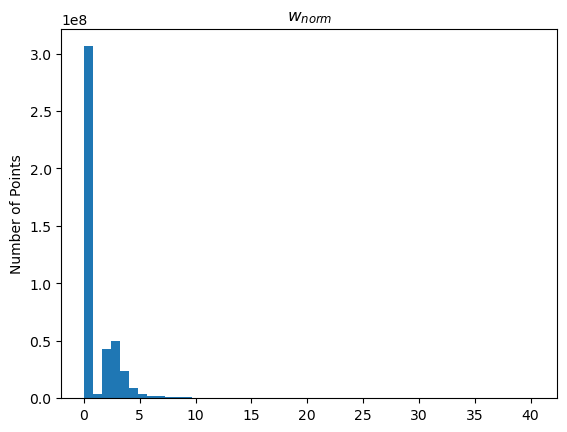

In [23]:
w_norm = w / np.nanmean(w)
print(f"mean(w) {np.nanmean(w_norm):.3f}")
print(f"std(w) {np.nanstd(w_norm):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w_norm).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w_{norm}$')
plt.show()

mean(w) 0.064
std(w) 0.017
sum(w)  9165084.800


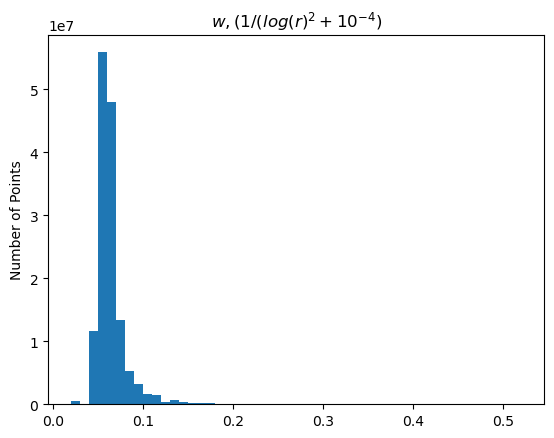

In [24]:
# *** This weighting scale works *** 

w = 1 / (np.log(r + 1e-4) ** 2 + 1e-4)

print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (log(r)^2 + 10^{-4}) $')
plt.show()

mean(w) 0.251
std(w) 0.030
sum(w)  35986537.278


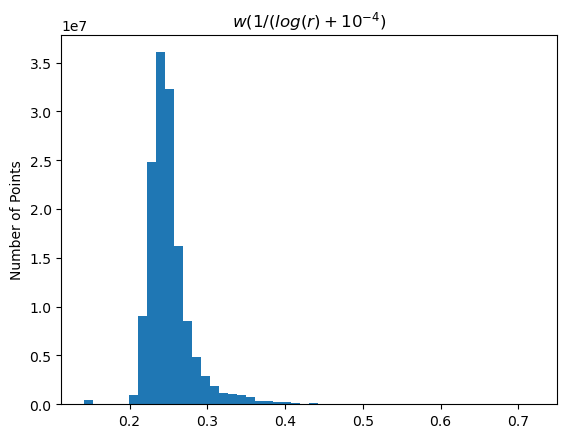

In [29]:
# Try not squaring the log term to see if its the masking that is causing the issue

w = 1 / (np.log(r + 1e-4) + 1e-4)

print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w (1 / (log(r) + 10^{-4}) $')
plt.show()

mean n_rt: 59.354
mean(w) 0.018
std(w) 0.006
sum(w)  7937410.390


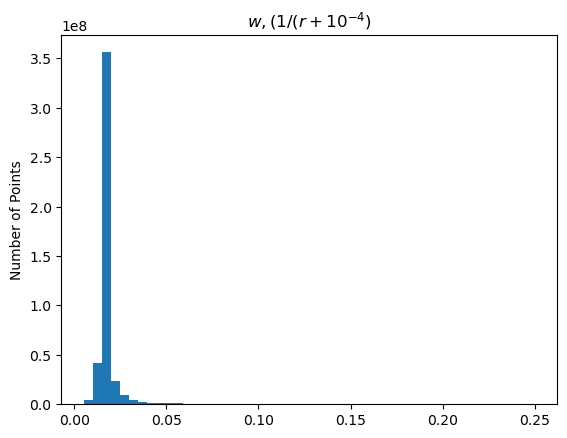

mean(w**2) 0.000
std(w**2) 0.001
sum(w**2)  157214.895


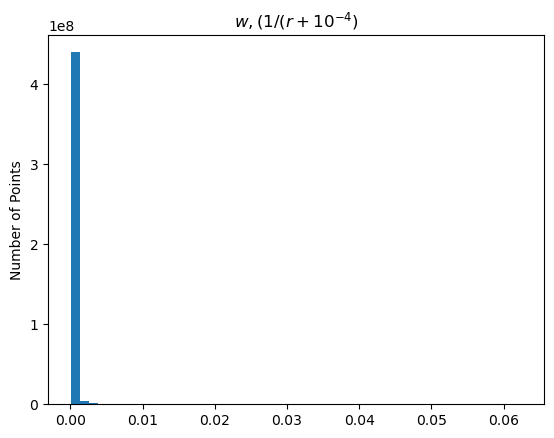

mean(w) 0.000
std(w) 0.001
sum(w)  157215.702


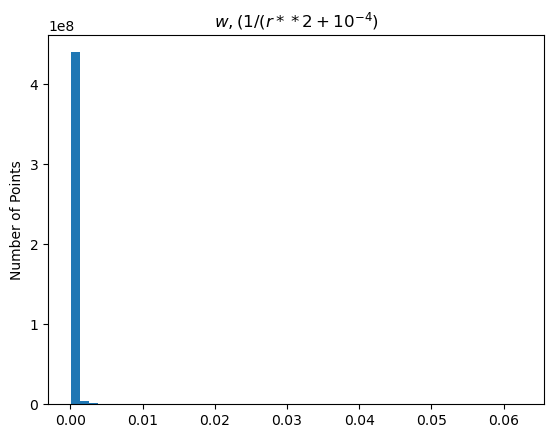

Normalize w by mean
mean(w) 1.000
std(w) 1.539
sum(w)  447850944.000


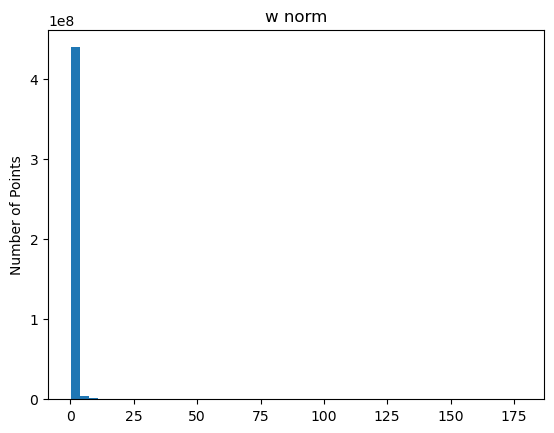

In [33]:
# Try normalizing weights by the speed std, with flag values removed

mean_n_rt = np.nanmean(rt_filt)
print(f"mean n_rt: {mean_n_rt:.3f}")

nrt_f2 = np.where(np.isnan(rt_filt), mean_n_rt, rt_filt)

w = 1 / (nrt_f2 + 1e-4)
print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r + 10^{-4}) $')
plt.show()
print(f"mean(w**2) {np.nanmean(w**2):.3f}")
print(f"std(w**2) {np.nanstd(w**2):.3f}")
print(f"sum(w**2)  {np.nansum(w**2):.3f}")

plt.hist((w**2).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r + 10^{-4}) $')
plt.show()

w = 1 / ((nrt_f2 ** 2) + 1e-4)
print(f"mean(w) {np.nanmean(w):.3f}")
print(f"std(w) {np.nanstd(w):.3f}")
print(f"sum(w)  {np.nansum(w):.3f}")

plt.hist((w).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title(r'$w, (1 / (r ** 2 + 10^{-4}) $')
plt.show()

print("Normalize w by mean")
w_norm = w / np.nanmean(w)
print(f"mean(w) {np.nanmean(w_norm):.3f}")
print(f"std(w) {np.nanstd(w_norm):.3f}")
print(f"sum(w)  {np.nansum(w_norm):.3f}")

plt.hist((w_norm).flatten(), bins = 50)
plt.ylabel('Number of Points')
plt.title('w norm')
plt.show()

In [ ]:
# When weights normalized to 1 - sum should be same as number of points!
# So weighted average vs number of points should not be making a difference here

print(len(rt.flatten()))

447850944
